In [1]:
import pandas as pd
from google.colab import files

In [2]:
# Mengunggah file Excel ke Google Colab
print("Silakan unggah file 'mpl_hero_stats.xlsx' Anda:")
uploaded = files.upload()

Silakan unggah file 'mpl_hero_stats.xlsx' Anda:


Saving mpl_hero_stats.xlsx to mpl_hero_stats.xlsx


In [3]:
# Memeriksa apakah file sudah diunggah
if 'mpl_hero_stats.xlsx' in uploaded:
    # Memuat data dari file Excel ke dalam DataFrame Pandas
    file_path = 'mpl_hero_stats.xlsx'
    df = pd.read_excel(file_path)

    # Menampilkan 5 baris pertama untuk verifikasi
    print("\nData berhasil dimuat. Berikut 5 baris pertama:")
    print(df.head())
else:
    print("File 'mpl_hero_stats.xlsx' tidak ditemukan. Pastikan nama file benar.")


Data berhasil dimuat. Berikut 5 baris pertama:
          Hero  Pick  Ban  Win  Win Rate      Role
0  Yi Sun-Shin    60   40   34      0.57  Assassin
1       Zhuxin    59   44   35      0.59      Mage
2       Harith    57   39   28      0.49      Mage
3      Granger    55   21   32      0.58  Marksman
4     Lancelot    54   47   22      0.41  Assassin


In [5]:
# Pastikan kolom 'Win Rate' sudah dalam format numerik
# Jika win rate dalam persen (contoh: '55%'), ubah ke float
if df['Win Rate'].dtype == 'object':
    df['Win Rate'] = df['Win Rate'].str.replace('%', '').astype(float) / 100.0

In [6]:
# Menghitung dan menampilkan hero dengan win rate tertinggi dan terendah
hero_tertinggi = df.loc[df['Win Rate'].idxmax()]
hero_terendah = df.loc[df['Win Rate'].idxmin()]

print("Hero dengan Win Rate Tertinggi:")
print(hero_tertinggi[['Hero', 'Win Rate']])

print("\nHero dengan Win Rate Terendah:")
print(hero_terendah[['Hero', 'Win Rate']])

Hero dengan Win Rate Tertinggi:
Hero        Esmeralda
Win Rate         0.69
Name: 24, dtype: object

Hero dengan Win Rate Terendah:
Hero        Hilda
Win Rate     0.31
Name: 25, dtype: object


In [7]:
# Menghitung rata-rata win rate per role
rata_rata_winrate_per_role = df.groupby('Role')['Win Rate'].mean().sort_values(ascending=False)

print("\nRata-rata Win Rate per Role (Tertinggi ke Terendah):")
print(rata_rata_winrate_per_role)


Rata-rata Win Rate per Role (Tertinggi ke Terendah):
Role
Support     0.530000
Fighter     0.515556
Tank        0.502000
Marksman    0.472500
Assassin    0.466000
Mage        0.456667
Name: Win Rate, dtype: float64


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-309467709.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pick', y='Hero', data=top_10_heroes, palette='viridis')


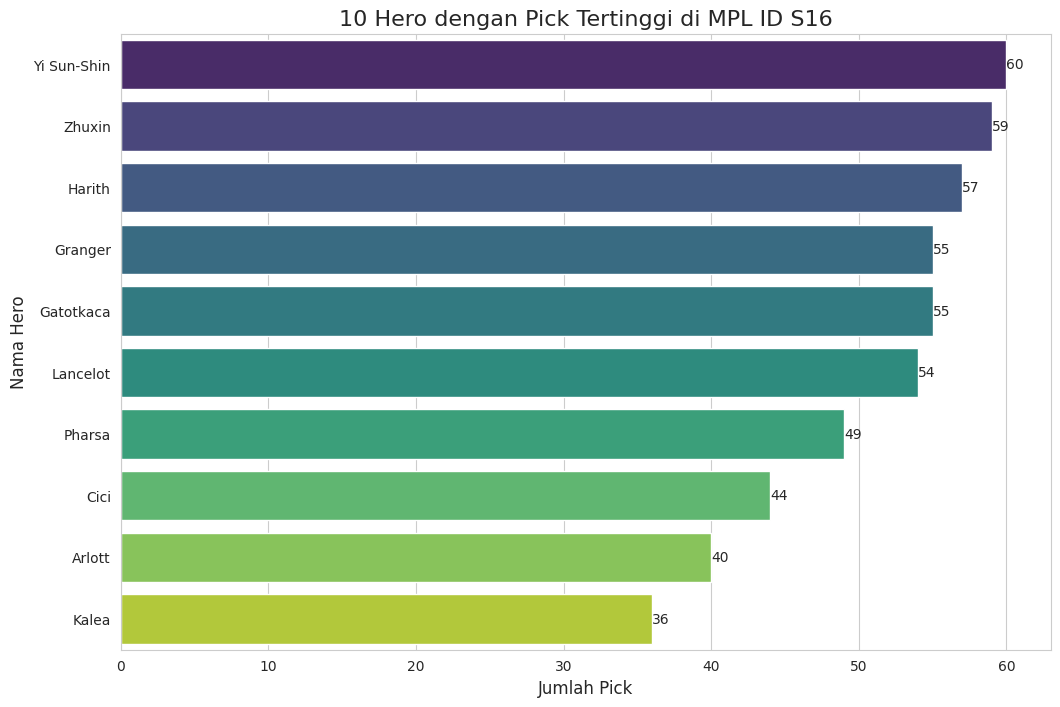

In [12]:
# Mengurutkan DataFrame berdasarkan kolom 'Pick'
df_sorted = df.sort_values('Pick', ascending=False)

# Mengambil 10 hero teratas
top_10_heroes = df_sorted.head(10)

# Membuat bar chart horizontal
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(x='Pick', y='Hero', data=top_10_heroes, palette='viridis')

# Memberikan judul dan label pada grafik
plt.title('10 Hero dengan Pick Tertinggi di MPL ID S16', fontsize=16)
plt.xlabel('Jumlah Pick', fontsize=12)
plt.ylabel('Nama Hero', fontsize=12)

# Menambahkan nilai (Pick) di setiap bar
for index, value in enumerate(top_10_heroes['Pick']):
    plt.text(value, index, f'{value}', va='center')

plt.show()

/tmp/ipython-input-3313134672.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rata_rata_winrate_per_role.index,


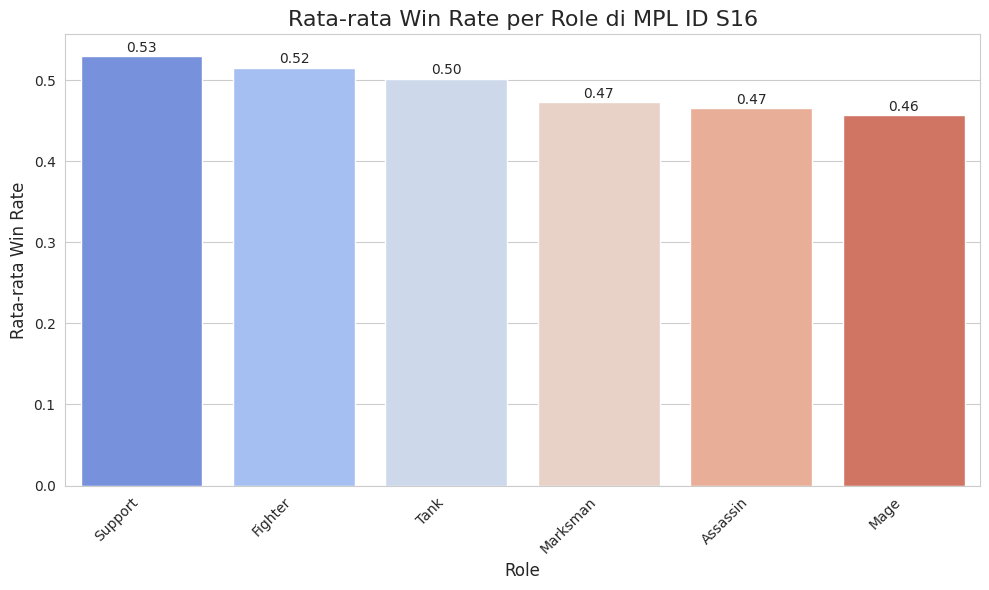

In [13]:
# Menghitung rata-rata win rate per role
rata_rata_winrate_per_role = df.groupby('Role')['Win Rate'].mean().sort_values(ascending=False)

# Membuat bar chart vertikal
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Menggunakan palet warna 'coolwarm' untuk visualisasi yang menarik
sns.barplot(x=rata_rata_winrate_per_role.index,
            y=rata_rata_winrate_per_role.values,
            palette='coolwarm')

# Menambahkan judul dan label pada grafik
plt.title('Rata-rata Win Rate per Role di MPL ID S16', fontsize=16)
plt.xlabel('Role', fontsize=12)
plt.ylabel('Rata-rata Win Rate', fontsize=12)

# Mengatur rotasi label sumbu X agar tidak tumpang tindih
plt.xticks(rotation=45, ha='right')

# Menambahkan nilai (rata-rata win rate) di atas setiap bar
for index, value in enumerate(rata_rata_winrate_per_role.values):
    plt.text(index, value + 0.005, f'{value:.2f}', ha='center')

plt.tight_layout() # Menyesuaikan layout agar tidak ada label yang terpotong
plt.show()

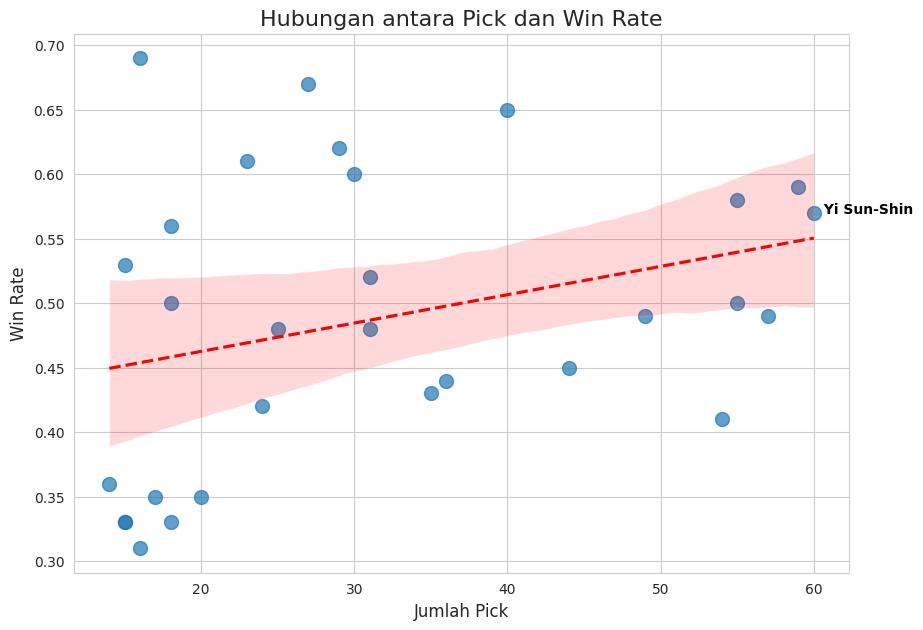

In [17]:
# Membuat scatter plot dengan garis regresi linear
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")

# sns.regplot digunakan untuk membuat scatter plot dengan garis regresi linear
sns.regplot(x='Pick', y='Win Rate', data=df, scatter_kws={'s': 100, 'alpha': 0.7}, line_kws={'color': 'red', 'linestyle': '--'})

# Menambahkan judul dan label pada grafik
plt.title('Hubungan antara Pick dan Win Rate', fontsize=16)
plt.xlabel('Jumlah Pick', fontsize=12)
plt.ylabel('Win Rate', fontsize=12)

# Menambahkan anotasi untuk hero tertentu (opsional, bisa disesuaikan)
# Misalnya, menyoroti hero dengan pick tertinggi
top_hero = df.sort_values('Pick', ascending=False).iloc[0]
plt.text(top_hero['Pick'], top_hero['Win Rate'], f"  {top_hero['Hero']}", horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.show()

In [15]:
# Menghitung koefisien korelasi
korelasi = df['Pick'].corr(df['Win Rate'])
print(f"\nKoefisien korelasi antara Pick dan Win Rate: {korelasi:.2f}")

# Menjelaskan korelasi
if korelasi > 0.3:
    print("Terdapat korelasi positif yang lemah, artinya hero yang sering di-pick cenderung memiliki win rate yang sedikit lebih tinggi.")
elif korelasi < -0.3:
    print("Terdapat korelasi negatif yang lemah, artinya hero yang sering di-pick cenderung memiliki win rate yang sedikit lebih rendah.")
else:
    print("Tidak ada korelasi yang signifikan, artinya popularitas hero (jumlah pick) tidak memiliki hubungan kuat dengan win rate mereka.")


Koefisien korelasi antara Pick dan Win Rate: 0.31
Terdapat korelasi positif yang lemah, artinya hero yang sering di-pick cenderung memiliki win rate yang sedikit lebih tinggi.


In [18]:
# Membuat DataFrame baru yang berisi 10 hero dengan pick tertinggi
top_10_picks_df = df.sort_values(by='Pick', ascending=False).head(10)

print("DataFrame 10 Hero dengan Pick Tertinggi:")
print(top_10_picks_df[['Hero', 'Pick', 'Win Rate']])

# Menghitung rata-rata win rate dari 10 hero teratas
rata_rata_winrate_top_10 = top_10_picks_df['Win Rate'].mean()

print(f"\nKesimpulan:")
print(f"Rata-rata win rate dari 10 hero dengan pick tertinggi adalah: {rata_rata_winrate_top_10:.2f}")

DataFrame 10 Hero dengan Pick Tertinggi:
          Hero  Pick  Win Rate
0  Yi Sun-Shin    60      0.57
1       Zhuxin    59      0.59
2       Harith    57      0.49
3      Granger    55      0.58
5    Gatotkaca    55      0.50
4     Lancelot    54      0.41
6       Pharsa    49      0.49
7         Cici    44      0.45
8       Arlott    40      0.65
9        Kalea    36      0.44

Kesimpulan:
Rata-rata win rate dari 10 hero dengan pick tertinggi adalah: 0.52


In [19]:
# Membandingkan dengan rata-rata win rate keseluruhan
rata_rata_winrate_keseluruhan = df['Win Rate'].mean()
print(f"Sebagai perbandingan, rata-rata win rate dari semua hero adalah: {rata_rata_winrate_keseluruhan:.2f}")

if rata_rata_winrate_top_10 > rata_rata_winrate_keseluruhan:
    print("\nIni menunjukkan bahwa hero yang paling sering di-pick cenderung memiliki win rate yang lebih tinggi daripada rata-rata keseluruhan hero.")
else:
    print("\nTidak ada perbedaan signifikan antara rata-rata win rate hero yang paling sering di-pick dengan rata-rata keseluruhan hero.")

Sebagai perbandingan, rata-rata win rate dari semua hero adalah: 0.49

Ini menunjukkan bahwa hero yang paling sering di-pick cenderung memiliki win rate yang lebih tinggi daripada rata-rata keseluruhan hero.


In [20]:
# Membuat DataFrame baru yang berisi 10 hero dengan pick terendah
bottom_10_picks_df = df.sort_values(by='Pick', ascending=True).head(10)

print("DataFrame 10 Hero dengan Pick Terendah:")
print(bottom_10_picks_df[['Hero', 'Pick', 'Win Rate']])

DataFrame 10 Hero dengan Pick Terendah:
         Hero  Pick  Win Rate
29        Yve    14      0.36
28      Fanny    15      0.33
26     Angela    15      0.53
27      Bruno    15      0.33
24  Esmeralda    16      0.69
25      Hilda    16      0.31
23   Fredrinn    17      0.35
22  Valentina    18      0.33
20    Khaleed    18      0.56
21     Moskov    18      0.50


In [21]:
# Menghitung rata-rata win rate dari 10 hero terendah
rata_rata_winrate_bottom_10 = bottom_10_picks_df['Win Rate'].mean()

# Menghitung rata-rata win rate dari 10 hero teratas (dari langkah sebelumnya)
top_10_picks_df = df.sort_values(by='Pick', ascending=False).head(10)
rata_rata_winrate_top_10 = top_10_picks_df['Win Rate'].mean()

print("\nKesimpulan:")
print(f"Rata-rata win rate dari 10 hero dengan pick terendah: {rata_rata_winrate_bottom_10:.2f}")
print(f"Rata-rata win rate dari 10 hero dengan pick tertinggi: {rata_rata_winrate_top_10:.2f}")


Kesimpulan:
Rata-rata win rate dari 10 hero dengan pick terendah: 0.43
Rata-rata win rate dari 10 hero dengan pick tertinggi: 0.52


In [22]:
# Membandingkan kedua kelompok
perbedaan_winrate = rata_rata_winrate_top_10 - rata_rata_winrate_bottom_10

print(f"\nPerbedaan yang ditemukan:")
print(f"Rata-rata win rate hero terpopuler lebih tinggi sebesar {perbedaan_winrate:.2f} daripada hero dengan pick terendah.")


Perbedaan yang ditemukan:
Rata-rata win rate hero terpopuler lebih tinggi sebesar 0.09 daripada hero dengan pick terendah.


/tmp/ipython-input-2645467063.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_winrate_per_role.index,
/tmp/ipython-input-2645467063.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_winrate_per_role.index,


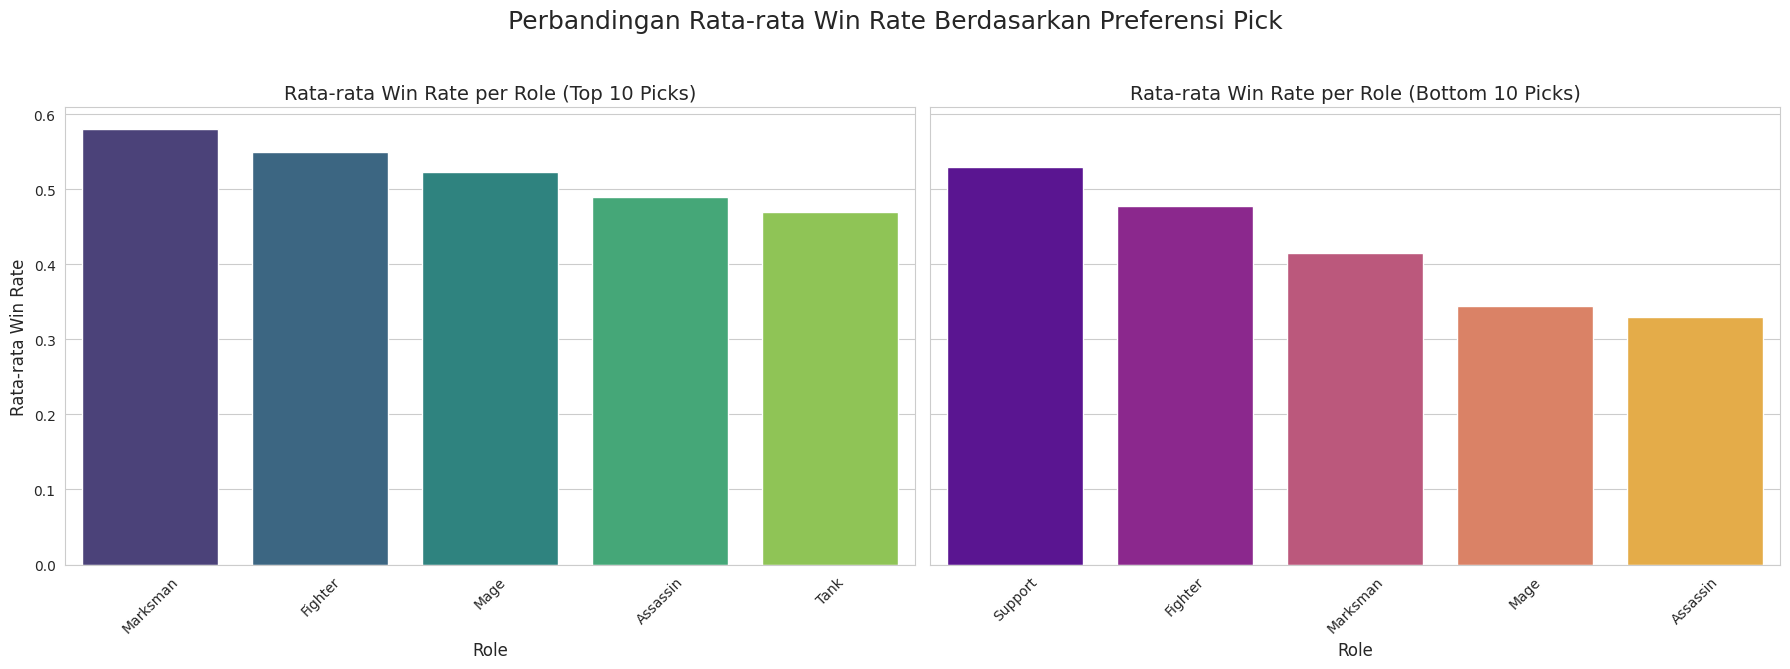

In [23]:
# Membagi DataFrame menjadi dua kelompok: top 10 picks dan bottom 10 picks
top_10_picks_df = df.sort_values(by='Pick', ascending=False).head(10)
bottom_10_picks_df = df.sort_values(by='Pick', ascending=True).head(10)

# Menghitung rata-rata win rate per role untuk masing-masing kelompok
top_winrate_per_role = top_10_picks_df.groupby('Role')['Win Rate'].mean().sort_values(ascending=False)
bottom_winrate_per_role = bottom_10_picks_df.groupby('Role')['Win Rate'].mean().sort_values(ascending=False)

# Membuat plot dengan dua subplot yang berdampingan
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)
sns.set_style("whitegrid")

# Plot pertama: Rata-rata Win Rate untuk Top 10 Picks
sns.barplot(x=top_winrate_per_role.index,
            y=top_winrate_per_role.values,
            palette='viridis',
            ax=axes[0])
axes[0].set_title('Rata-rata Win Rate per Role (Top 10 Picks)', fontsize=14)
axes[0].set_xlabel('Role', fontsize=12)
axes[0].set_ylabel('Rata-rata Win Rate', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Plot kedua: Rata-rata Win Rate untuk Bottom 10 Picks
sns.barplot(x=bottom_winrate_per_role.index,
            y=bottom_winrate_per_role.values,
            palette='plasma',
            ax=axes[1])
axes[1].set_title('Rata-rata Win Rate per Role (Bottom 10 Picks)', fontsize=14)
axes[1].set_xlabel('Role', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Menyesuaikan layout dan menampilkan plot
plt.suptitle('Perbandingan Rata-rata Win Rate Berdasarkan Preferensi Pick', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [24]:
# Kesimpulan
print("\nKesimpulan:")
print("Visualisasi ini membandingkan performa rata-rata win rate per role antara hero yang paling sering di-pick dan yang paling jarang di-pick.")
print("Jika grafik di sisi kiri (Top Picks) menunjukkan win rate yang konsisten lebih tinggi di berbagai role dibandingkan grafik di sisi kanan (Bottom Picks), ini mengindikasikan bahwa popularitas hero berkorelasi dengan performa role secara umum di turnamen.")


Kesimpulan:
Visualisasi ini membandingkan performa rata-rata win rate per role antara hero yang paling sering di-pick dan yang paling jarang di-pick.
Jika grafik di sisi kiri (Top Picks) menunjukkan win rate yang konsisten lebih tinggi di berbagai role dibandingkan grafik di sisi kanan (Bottom Picks), ini mengindikasikan bahwa popularitas hero berkorelasi dengan performa role secara umum di turnamen.


In [25]:
# Memfilter hero berdasarkan kriteria yang diberikan
# Pick di bawah 20 dan Win Rate di atas 55% (0.55)
df_filtered = df[(df['Pick'] < 20) & (df['Win Rate'] > 0.55)]

# Memilih kolom yang relevan untuk ditampilkan
df_result = df_filtered[['Hero', 'Role', 'Pick', 'Win Rate']]

print("Hero dengan Pick < 20 dan Win Rate > 55%:")
print(df_result)

Hero dengan Pick < 20 dan Win Rate > 55%:
         Hero     Role  Pick  Win Rate
20    Khaleed  Fighter    18      0.56
24  Esmeralda  Fighter    16      0.69


In [26]:
print("\n")
print("Hipotesis mengapa hero-hero ini jarang dipilih meskipun efektif:")
print("1. **Keahlian Tinggi (High Skill Ceiling):** Beberapa hero memerlukan mekanik atau pemahaman game yang kompleks untuk dimainkan secara efektif. Pemain mungkin menghindarinya karena risiko melakukan kesalahan lebih tinggi.")
print("2. **Keterbatasan dalam Draft (Situational Picks):** Hero-hero ini mungkin sangat kuat hanya dalam komposisi tim atau melawan hero tertentu. Dalam konteks turnamen yang dinamis, mereka mungkin dianggap terlalu 'situasional' dan kurang fleksibel dibandingkan hero meta lainnya.")
print("3. **Kurang Populer (Unpopular in Meta):** Meskipun data menunjukkan mereka efektif, hero-hero ini mungkin tidak sejalan dengan tren atau gaya bermain tim yang sedang populer. Tim cenderung lebih memilih hero yang sudah terbukti konsisten di berbagai skenario.")
print("4. **Rentang Waktu Analisis:** Data yang digunakan mungkin hanya mencakup sebagian kecil dari turnamen, di mana hero-hero ini mungkin hanya digunakan dalam 'gimmick picks' atau strategi kejutan yang berhasil, namun tidak cukup untuk meningkatkan jumlah pick mereka secara keseluruhan.")



Hipotesis mengapa hero-hero ini jarang dipilih meskipun efektif:
1. **Keahlian Tinggi (High Skill Ceiling):** Beberapa hero memerlukan mekanik atau pemahaman game yang kompleks untuk dimainkan secara efektif. Pemain mungkin menghindarinya karena risiko melakukan kesalahan lebih tinggi.
2. **Keterbatasan dalam Draft (Situational Picks):** Hero-hero ini mungkin sangat kuat hanya dalam komposisi tim atau melawan hero tertentu. Dalam konteks turnamen yang dinamis, mereka mungkin dianggap terlalu 'situasional' dan kurang fleksibel dibandingkan hero meta lainnya.
3. **Kurang Populer (Unpopular in Meta):** Meskipun data menunjukkan mereka efektif, hero-hero ini mungkin tidak sejalan dengan tren atau gaya bermain tim yang sedang populer. Tim cenderung lebih memilih hero yang sudah terbukti konsisten di berbagai skenario.
4. **Rentang Waktu Analisis:** Data yang digunakan mungkin hanya mencakup sebagian kecil dari turnamen, di mana hero-hero ini mungkin hanya digunakan dalam 'gimmick picks' a